In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

palette = ["#2D2926FF", "#E94B3CFF"]
color_palette = sns.color_palette(palette)


warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_csv("data/groups/0.1/grouped_data.csv")
df.head()


,mobleyID,pol,psa,n_donors,nrotb,group_id,dG_exp,n_acceptors,logP
0,mobley_7532833,-7.491408,23.79,0,0,7.0,-3.88,1,0.52988
1,mobley_2198613,-1.497948,0.00,0,0,4.0,-0.63,0,1.24510
2,mobley_9257453,-9.095077,20.23,1,0,5.0,-7.29,1,2.69900
3,mobley_755351,-13.409148,35.25,1,1,5.0,-7.29,2,1.27740
4,mobley_9729792,-3.356425,0.00,0,0,NaN,-0.99,0,2.05870


In [23]:
# Count nan
df.isnull().sum()

mobleyID       0
pol            0
psa            0
n_donors       0
nrotb          0
group_id       0
dG_exp         0
n_acceptors    0
logP           0
dtype: int64

In [24]:
# Replace null 'group_id' values with 8
df["group_id"] = df["group_id"].fillna(8)

# Count nan again
df.isnull().sum()

mobleyID       0
pol            0
psa            0
n_donors       0
nrotb          0
group_id       0
dG_exp         0
n_acceptors    0
logP           0
dtype: int64

In [7]:
df.shape

(643, 9)

In [8]:
features = ["pol", "psa", "n_donors", "nrotb", "n_acceptors", "logP"]
X = df[features]
y = df["dG_exp"]
groups = df["group_id"]
id_column = "mobleyID"

In [9]:
print(df[features + ["dG_exp"]].describe())

              pol         psa    n_donors       nrotb  n_acceptors  \
count  643.000000  643.000000  643.000000  643.000000   643.000000   
mean    -9.583435   20.889207    0.343701    1.629860     1.382582   
std     10.516359   23.806500    0.627811    1.971726     1.610850   
min   -103.116055    0.000000    0.000000    0.000000     0.000000   
25%    -11.689927    0.000000    0.000000    0.000000     0.000000   
50%     -7.678724   17.070000    0.000000    1.000000     1.000000   
75%     -3.611565   26.300000    1.000000    3.000000     2.000000   
max     -0.049148  136.100000    6.000000   12.000000     9.000000   

             logP      dG_exp  
count  643.000000  643.000000  
mean     1.926940   -3.806952  
std      1.491136    3.846124  
min     -3.585400  -25.470000  
25%      1.123300   -5.730000  
50%      1.780100   -3.540000  
75%      2.569650   -1.220000  
max      9.887600    3.430000  


In [10]:
import os

import seaborn as sns


def plot_distributions(df, features, figsize=(8, 6), output_dir=None, custom_bins=None):
    """
    Create publication-quality KDE plots for each feature with detailed statistics and consistent bar alignment.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the features
    features (list): List of feature names to plot
    figsize (tuple): Figure size (width, height) for each plot
    output_dir (str, optional): Directory to save plots. If None, plots are displayed.
    custom_bins (dict, optional): Dictionary specifying the number of bins for specific features.

    Returns:
    list: List of generated figure objects
    """
    # Set Seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("dark")  # Use a darker color palette for publication quality

    # List to store figures
    figures = []

    # Plot each feature
    for col in features:
        # Create a new figure for each feature
        fig, ax = plt.subplots(figsize=figsize)

        # Determine the number of bins
        if custom_bins and col in custom_bins:
            bins = custom_bins[col]
        else:
            bins = "auto"
        # bins = None

        # Create histogram with consistent bar alignment
        sns.histplot(
            data=df,
            x=col,
            stat="density",
            kde=True,
            ax=ax,
            color="#1f77b4",  # Darker blue
            alpha=0.6,
            bins=bins,  # Use custom bins
            line_kws={"linewidth": 2.5},  # Thicker KDE line
        )

        # Calculate statistics
        mean = df[col].mean()
        std = df[col].std()
        median = df[col].median()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        # Create statistics text
        stats_text = (
            f"Mean: {mean:.2f}\n"
            f"Std: {std:.2f}\n"
            f"Median: {median:.2f}\n"
            f"Q1: {q1:.2f}\n"
            f"Q3: {q3:.2f}"
        )

        # Add statistics text
        ax.text(
            0.95,
            0.95,
            stats_text,
            transform=ax.transAxes,
            verticalalignment="top",
            horizontalalignment="right",
            fontsize=10,  # Increase font size for text box
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.9),
        )

        # Customize the plot
        ax.set_title(f"Distribution of {col}", fontsize=16, pad=10)
        ax.set_xlabel(col, fontsize=14)
        ax.set_ylabel("Density", fontsize=14)

        # Increase axis line width
        ax.spines["top"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["bottom"].set_linewidth(1.5)

        # Increase tick size
        ax.tick_params(axis="both", which="major", labelsize=12)

        # Add rug plot for better visualization
        sns.rugplot(data=df, x=col, ax=ax, color="gray", alpha=0.5)

        # Adjust layout
        plt.tight_layout()

        # Save or display the plot
        if output_dir:
            # Ensure output directory exists
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(
                os.path.join(output_dir, f"{col}_distribution.png"), dpi=300
            )  # Publication quality
            plt.close(fig)  # Close the figure to free up memory
        else:
            figures.append(fig)

    # If not saving, return list of figures
    return figures if output_dir is None else None


In [11]:
# Specify custom bins for 'psa' and 'pol'
custom_bins = {
    "psa": 10,
    "pol": 8,
    "n_donors": 7,
    "n_acceptors": 1,
    "nrotb": 1,
}

# Call the function with custom bins
figures = plot_distributions(
    df,
    features=features,
    custom_bins=custom_bins,
    output_dir="plots/eda/",
)

plt.show()

                  pol       psa  n_donors     nrotb  n_acceptors      logP  \
pol          1.000000 -0.584286 -0.300964 -0.285312    -0.622798  0.140572   
psa         -0.584286  1.000000  0.483050  0.322221     0.897125 -0.350787   
n_donors    -0.300964  0.483050  1.000000 -0.046808     0.251747 -0.372010   
nrotb       -0.285312  0.322221 -0.046808  1.000000     0.463468  0.136239   
n_acceptors -0.622798  0.897125  0.251747  0.463468     1.000000 -0.233318   
logP         0.140572 -0.350787 -0.372010  0.136239    -0.233318  1.000000   
dG_exp       0.609131 -0.706414 -0.689314 -0.006366    -0.559305  0.347416   

               dG_exp  
pol          0.609131  
psa         -0.706414  
n_donors    -0.689314  
nrotb       -0.006366  
n_acceptors -0.559305  
logP         0.347416  
dG_exp       1.000000  


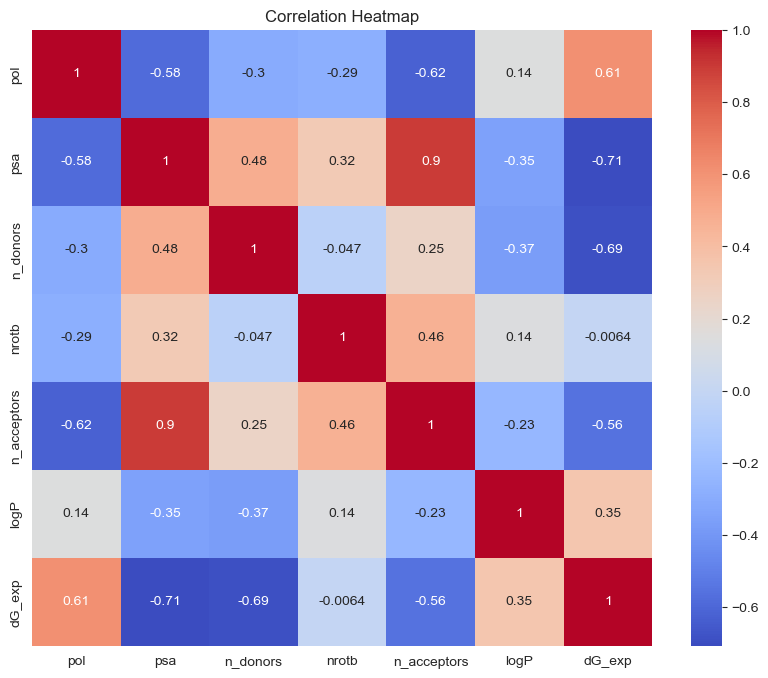

In [12]:
correlation_matrix = df[features + ["dG_exp"]].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Group distribution:
group_id
5.0    250
8.0    172
4.0     85
3.0     35
1.0     27
2.0     26
0.0     24
7.0     12
6.0     12
Name: count, dtype: int64


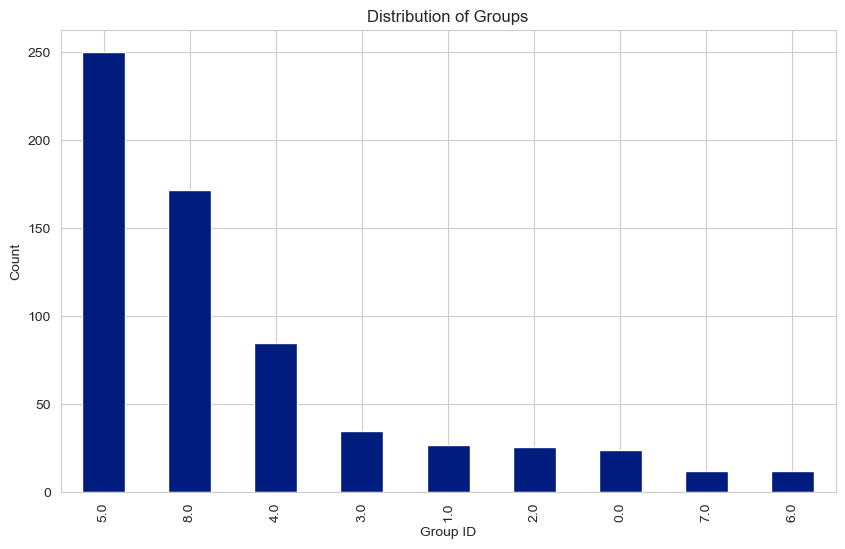

In [13]:
group_counts = df["group_id"].value_counts()
print("Group distribution:")
print(group_counts)

plt.figure(figsize=(10, 6))
group_counts.plot(kind="bar")
plt.title("Distribution of Groups")
plt.xlabel("Group ID")
plt.ylabel("Count")
plt.show()

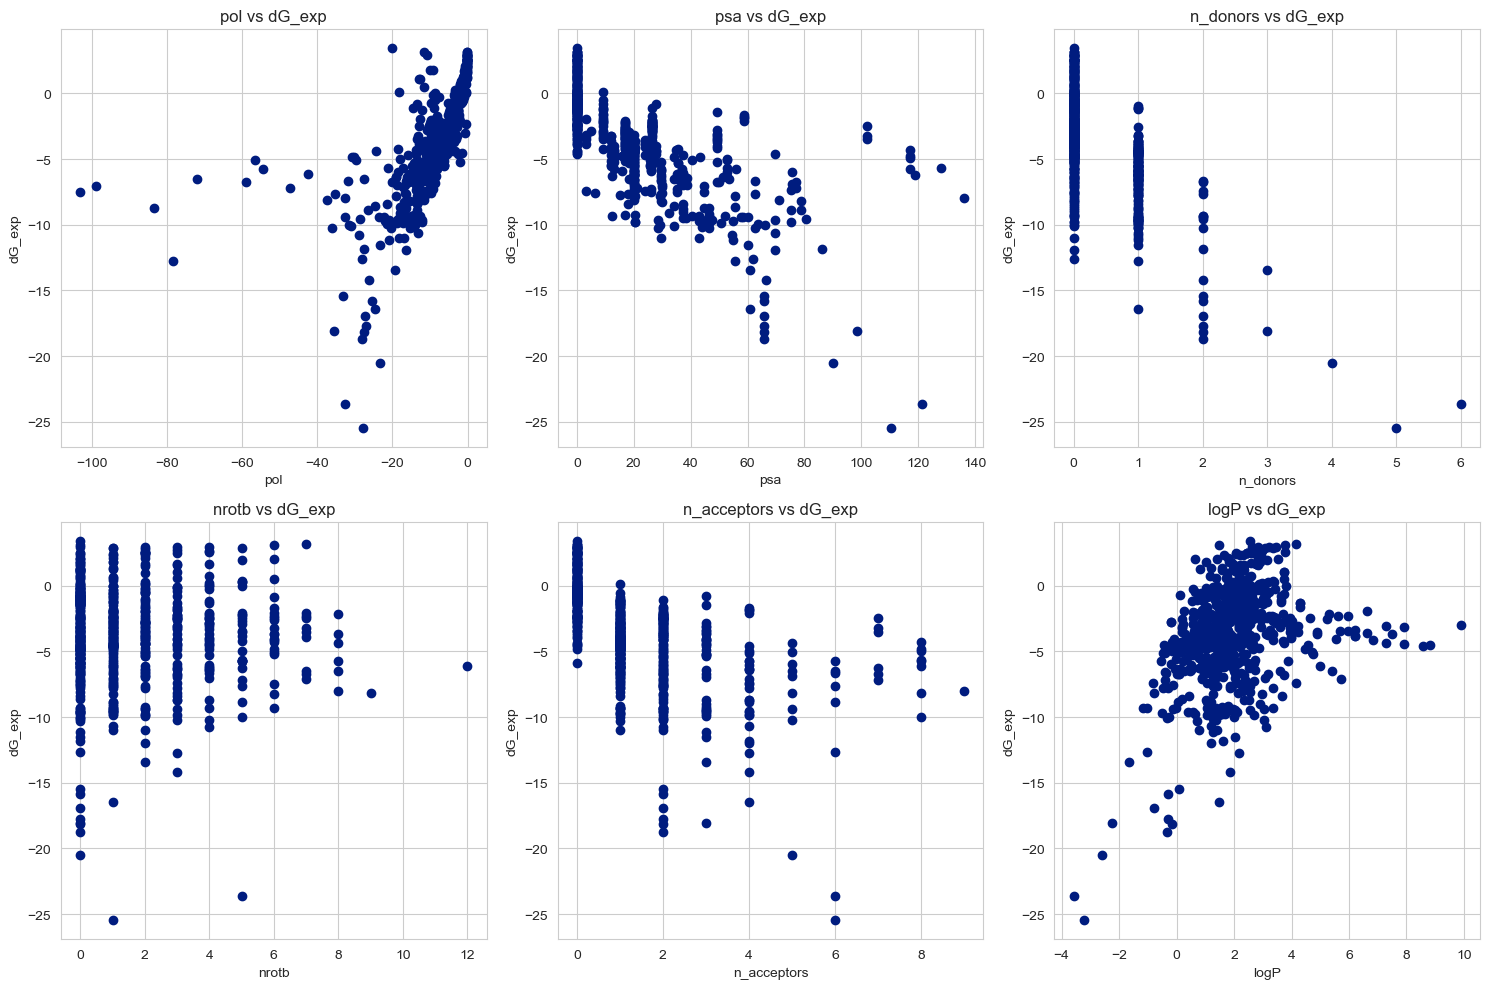

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, feature in enumerate(features):
    axs[i].scatter(df[feature], df["dG_exp"])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("dG_exp")
    axs[i].set_title(f"{feature} vs dG_exp")

plt.tight_layout()
plt.show()

In [15]:
print(df.groupby("group_id")[features + ["dG_exp"]].mean())

                pol        psa  n_donors     nrotb  n_acceptors      logP  \
group_id                                                                    
0.0       -6.169074  20.230000  1.000000  2.375000     1.000000  1.256171   
1.0       -7.730530  17.070000  0.000000  3.000000     1.000000  1.744252   
2.0       -1.676771   0.000000  0.000000  1.115385     0.000000  2.254838   
3.0      -10.240692  28.185714  0.171429  2.657143     1.828571  1.167669   
4.0       -2.366038   0.000000  0.000000  1.423529     0.000000  2.227425   
5.0      -11.821170  24.238880  0.400000  1.240000     1.596000  2.690193   
6.0       -1.672962   5.057500  0.250000  0.500000     0.250000  2.214792   
7.0       -7.826986  39.269167  0.250000  1.500000     1.833333  0.696285   
8.0      -12.400822  28.530291  0.494186  1.936047     2.034884  0.962054   

            dG_exp  
group_id            
0.0      -4.316250  
1.0      -3.067037  
2.0       0.742308  
3.0      -3.122571  
4.0       0.485176  
5.0  

dG_exp:
Number of outliers: 15
Percentage of outliers: 2.33%
Range of outliers: -25.47 to -12.64


pol:
Number of outliers: 40
Percentage of outliers: 6.22%
Range of outliers: -103.11605507515031 to -24.37443033662777


psa:
Number of outliers: 32
Percentage of outliers: 4.98%
Range of outliers: 66.24000000000001 to 136.09999999999997


n_donors:
Number of outliers: 5
Percentage of outliers: 0.78%
Range of outliers: 3 to 6




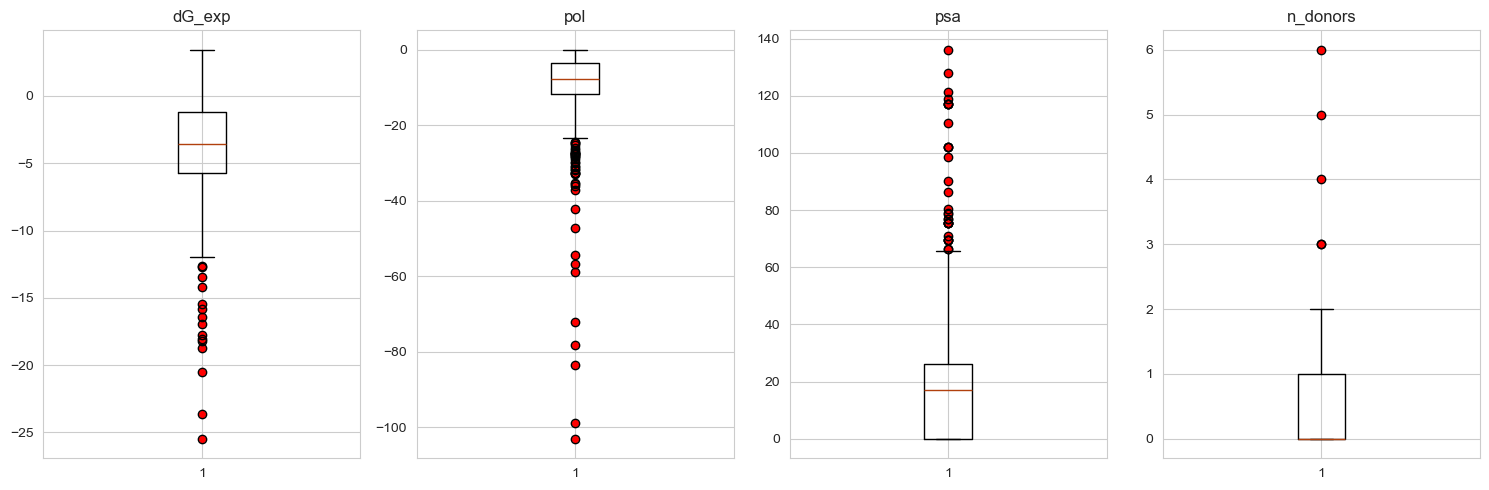

In [16]:
import matplotlib.pyplot as plt

variables = ["dG_exp", "pol", "psa", "n_donors"]

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, var in enumerate(variables):
    data = df[var]

    # Calculate IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Plot
    axs[i].boxplot(data)
    axs[i].scatter(np.ones(len(outliers)), outliers, color="red", s=20)
    axs[i].set_title(var)

    print(f"{var}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(data) * 100:.2f}%")
    print(f"Range of outliers: {outliers.min()} to {outliers.max()}")
    print("\n")

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import skew

# List of variables to analyze
variables = ["pol", "psa", "n_donors", "nrotb", "n_acceptors", "dG_exp"]

# Calculate skewness
skewness = df[variables].apply(lambda x: skew(x))

print("Skewness for each variable:")
print(skewness)

Skewness for each variable:
pol           -4.189291
psa            1.720184
n_donors       2.985912
nrotb          1.424754
n_acceptors    1.936294
dG_exp        -1.170354
dtype: float64


In [18]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler


class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, column="dG_exp"):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        data = df[self.column]
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(data >= lower_bound) & (data <= upper_bound)]
        return df


class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pol_transformer=None):
        self.pol_transformer = pol_transformer
        self.columns = [
            "pol",
            "n_acceptors",
            "n_donors",
            "nrotb",
            "psa",
        ]

    def fit(self, X, y=None):
        self.pol_transformer.fit(X[self.columns])
        return self

    def transform(self, X):
        X_ = X.copy()
        X_[self.columns] = self.pol_transformer.transform(X_[self.columns])
        return X_


class CustomStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(
        self,
        columns=[
            "pol",
            "psa",
            "logP",
            "n_acceptors",
            "n_donors",
            "nrotb",
        ],
    ):
        self.columns = columns
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X_ = X.copy()
        X_[self.columns] = self.scaler.transform(X_[self.columns])
        return X_


# Create the pipeline
preprocessing_pipeline = Pipeline(
    [
        ("outlier_remover", OutlierRemover()),
        (
            "custom_transformer",
            CustomTransformer(pol_transformer=PowerTransformer(method="yeo-johnson")),
        ),
        ("standard_scaler", CustomStandardScaler()),
    ]
)


# Assuming 'df' is your DataFrame
# Apply the pipeline
df_processed = preprocessing_pipeline.fit_transform(df)

print("Original shape:", df.shape)
print("Processed shape:", df_processed.shape)

# Check the first few rows of the processed data
print(df_processed.head())

# Verify the transformations
print("\nMean of scaled features:")
print(df_processed[["pol", "psa", "dG_exp", "logP"]].mean())
print("\nStandard deviation of scaled features:")
print(df_processed[["pol", "psa", "dG_exp", "logP"]].std())

print("\nSkewness of log-transformed 'pol':", skew(df_processed["pol"]))

Original shape: (643, 9)
Processed shape: (628, 9)
         mobleyID       pol       psa  n_donors     nrotb  group_id  dG_exp  \
0  mobley_7532833 -0.127256  0.615801 -0.619032 -1.118819       7.0   -3.88   
1  mobley_2198613  1.271189 -1.248611 -0.619032 -1.118819       4.0   -0.63   
2  mobley_9257453 -0.344881  0.497294  1.609356 -1.118819       5.0   -7.29   
3   mobley_755351 -0.809301  0.921488  1.609356  0.079647       5.0   -7.29   
4  mobley_9729792  0.664935 -1.248611 -0.619032 -1.118819       8.0   -0.99   

   n_acceptors      logP  
0     0.146662 -1.023346  
1    -1.242242 -0.522037  
2     0.146662  0.497027  
3     0.810954 -0.499397  
4    -1.242242  0.048230  

Mean of scaled features:
pol      -4.242891e-18
psa      -4.242891e-17
dG_exp   -3.483933e+00
logP      1.612298e-16
dtype: float64

Standard deviation of scaled features:
pol       1.000797
psa       1.000797
dG_exp    3.218252
logP      1.000797
dtype: float64

Skewness of log-transformed 'pol': -0.021759288

In [19]:
df_processed

,mobleyID,pol,psa,n_donors,nrotb,group_id,dG_exp,n_acceptors,logP
0,mobley_7532833,-0.127256,0.615801,-0.619032,-1.118819,7.0,-3.88,0.146662,-1.023346
1,mobley_2198613,1.271189,-1.248611,-0.619032,-1.118819,4.0,-0.63,-1.242242,-0.522037
2,mobley_9257453,-0.344881,0.497294,1.609356,-1.118819,5.0,-7.29,0.146662,0.497027
3,mobley_755351,-0.809301,0.921488,1.609356,0.079647,5.0,-7.29,0.810954,-0.499397
4,mobley_9729792,0.664935,-1.248611,-0.619032,-1.118819,8.0,-0.99,-1.242242,0.048230
...,...,...,...,...,...,...,...,...,...
638,mobley_9565165,-0.027949,-1.248611,-0.619032,-1.118819,5.0,-3.35,-1.242242,0.888699
639,mobley_2845466,0.155077,0.432261,-0.619032,-1.118819,5.0,-3.37,0.810954,2.949676
640,mobley_7200804,-0.189655,0.497294,1.609356,-1.118819,5.0,-5.29,0.146662,-0.321434
641,mobley_1046331,-0.770049,0.691309,-0.619032,0.647232,5.0,-3.82,0.810954,-0.538368


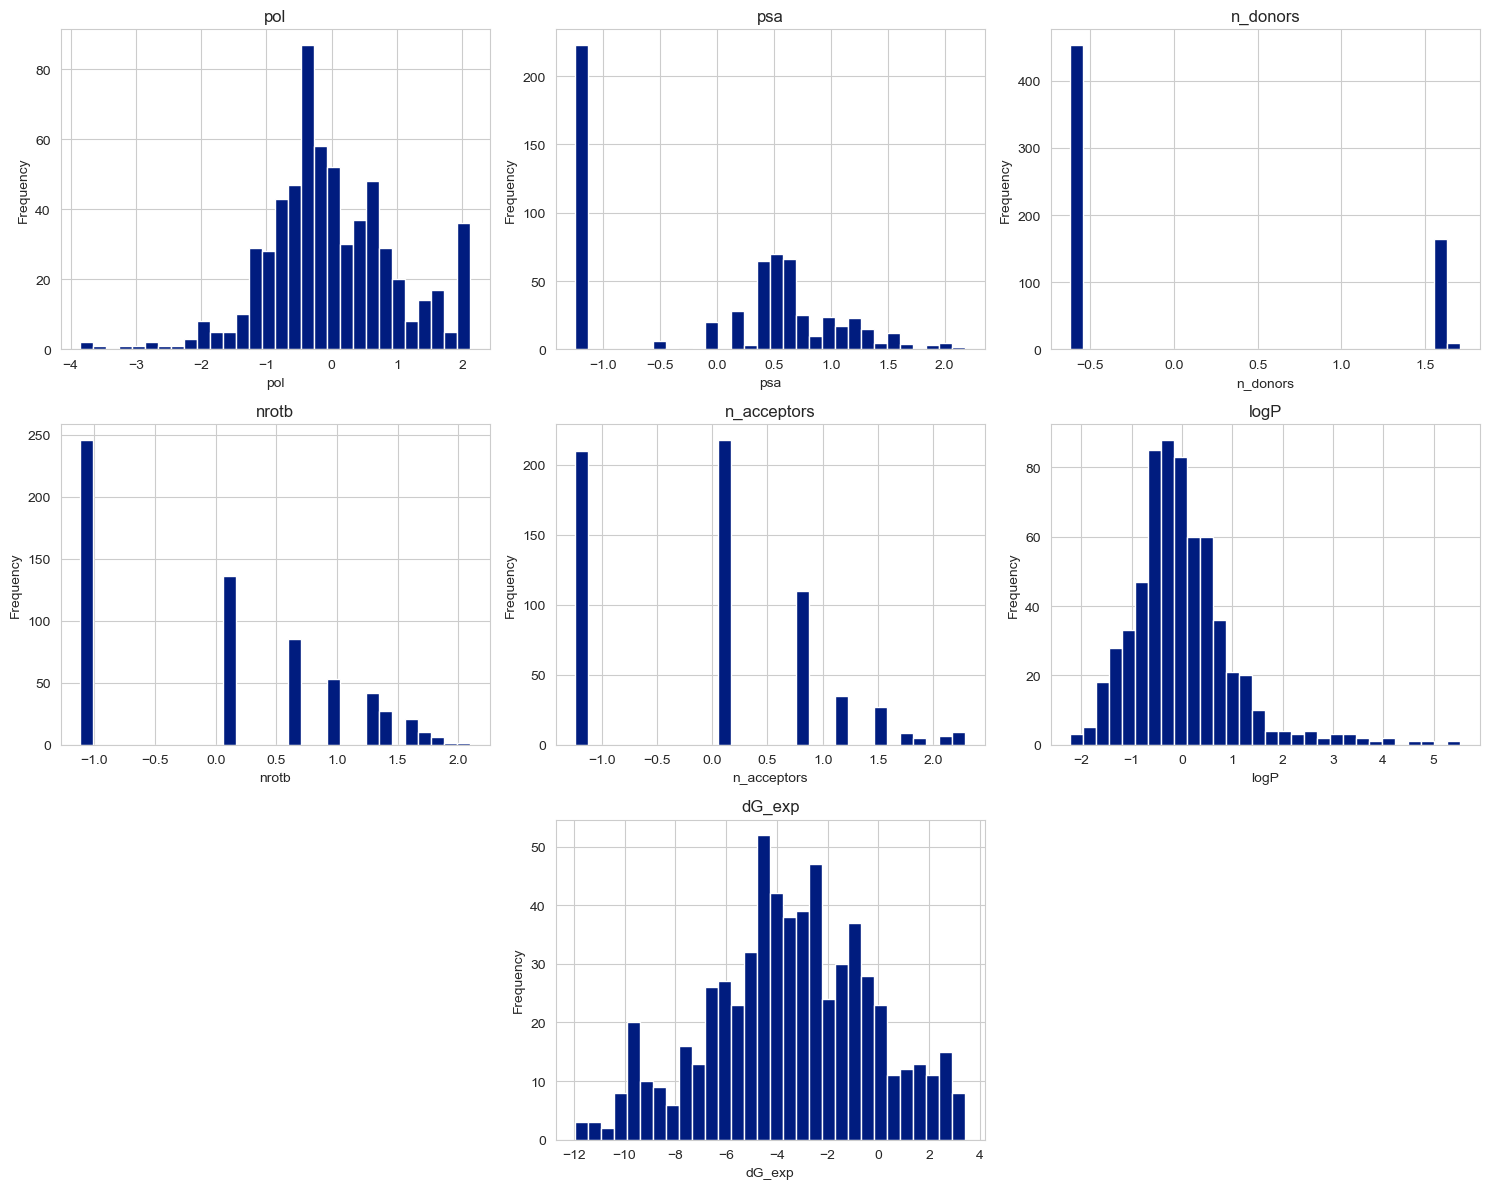

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the 2D array of axes, but keep it as a 2D array
axs_flat = axs.flatten()

for i, col in enumerate(features + ["dG_exp"]):
    if i < 6:
        # For the first two rows, use axes as normal
        ax = axs_flat[i]
    else:
        # For the last plot, use the center axis in the last row
        ax = axs[2, 1]

    ax.hist(df_processed[col], bins=30)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Remove the unused subplots
fig.delaxes(axs[2, 0])
fig.delaxes(axs[2, 2])

plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import skew

# List of variables to analyze
variables = ["pol", "psa", "n_donors", "nrotb", "n_acceptors", "dG_exp"]

# Calculate skewness
skewness = df_processed[variables].apply(lambda x: skew(x))

print("Skewness for each variable:")
print(skewness)

Skewness for each variable:
pol           -0.021759
psa           -0.156593
n_donors       0.996750
nrotb          0.124330
n_acceptors    0.067901
dG_exp        -0.169116
dtype: float64


In [25]:
# Save the dataframe as a csv file
df_processed.to_csv("data/groups/0.1/grouped_data_without_outliers.csv", index=False)

In [26]:
# Create the pipeline
preprocessing_pipeline = Pipeline(
    [
        (
            "custom_transformer",
            CustomTransformer(pol_transformer=PowerTransformer(method="yeo-johnson")),
        ),
        ("standard_scaler", CustomStandardScaler()),
    ]
)


# Assuming 'df' is your DataFrame
# Apply the pipeline
df_processed_with_outliers = preprocessing_pipeline.fit_transform(df)

print("Original shape:", df.shape)
print("Processed shape:", df_processed.shape)

# Check the first few rows of the processed data
print(df_processed_with_outliers.head())

# Verify the transformations
print("\nMean of scaled features:")
print(df_processed_with_outliers[["pol", "psa", "dG_exp", "logP"]].mean())
print("\nStandard deviation of scaled features:")
print(df_processed_with_outliers[["pol", "psa", "dG_exp", "logP"]].std())

print("\nSkewness of log-transformed 'pol':", skew(df_processed_with_outliers["pol"]))

Original shape: (643, 9)
Processed shape: (628, 9)
         mobleyID       pol       psa  n_donors     nrotb  group_id  dG_exp  \
0  mobley_7532833 -0.087236  0.568524 -0.642557 -1.110840       7.0   -3.88   
1  mobley_2198613  1.280056 -1.263076 -0.642557 -1.110840       4.0   -0.63   
2  mobley_9257453 -0.297942  0.451506  1.536875 -1.110840       5.0   -7.29   
3   mobley_755351 -0.745887  0.870672  1.536875  0.092983       5.0   -7.29   
4  mobley_9729792  0.684354 -1.263076 -0.642557 -1.110840       8.0   -0.99   

   n_acceptors      logP  
0     0.107936 -0.937639  
1    -1.255269 -0.457618  
2     0.107936  0.518169  
3     0.769478 -0.435940  
4    -1.255269  0.088431  

Mean of scaled features:
pol       3.867651e-17
psa       0.000000e+00
dG_exp   -3.806952e+00
logP      6.906520e-17
dtype: float64

Standard deviation of scaled features:
pol       1.000779
psa       1.000779
dG_exp    3.846124
logP      1.000779
dtype: float64

Skewness of log-transformed 'pol': -0.015193015

In [28]:
# Save the dataframe as a csv file
df_processed_with_outliers.to_csv(
    "data/groups/0.1/grouped_data_with_outliers.csv", index=False
)